github link:https://github.com/Maniharshith18/SVM-Kernel-Tutorial.git

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap


In [4]:
def plot_svm_decision_boundary(model, X, y, ax, title):
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

    ax.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=50)

    # highlight support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
               s=100, facecolors='none', edgecolors='k', linewidths=1.5, label='Support Vectors')

    ax.set_title(title)
    ax.legend()


In [5]:
# Linear dataset
X_linear, y_linear = make_classification(n_samples=200, n_features=2,
                                         n_informative=2, n_redundant=0,
                                         n_clusters_per_class=1, flip_y=0.1,
                                         class_sep=2, random_state=42)

# Moons dataset
X_moons, y_moons = make_moons(n_samples=200, noise=0.2, random_state=42)

# Circles dataset
X_circles, y_circles = make_circles(n_samples=200, noise=0.1, factor=0.5, random_state=42)


In [6]:
# List of kernels and parameters to explore
kernels = {
    'Linear': {'kernel': 'linear'},
    'Poly degree 3': {'kernel': 'poly', 'degree': 3, 'C':1},
    'RBF gamma 1': {'kernel': 'rbf', 'gamma': 1, 'C':1}
}

datasets = {
    'Linear': (X_linear, y_linear),
    'Moons': (X_moons, y_moons),
    'Circles': (X_circles, y_circles)
}


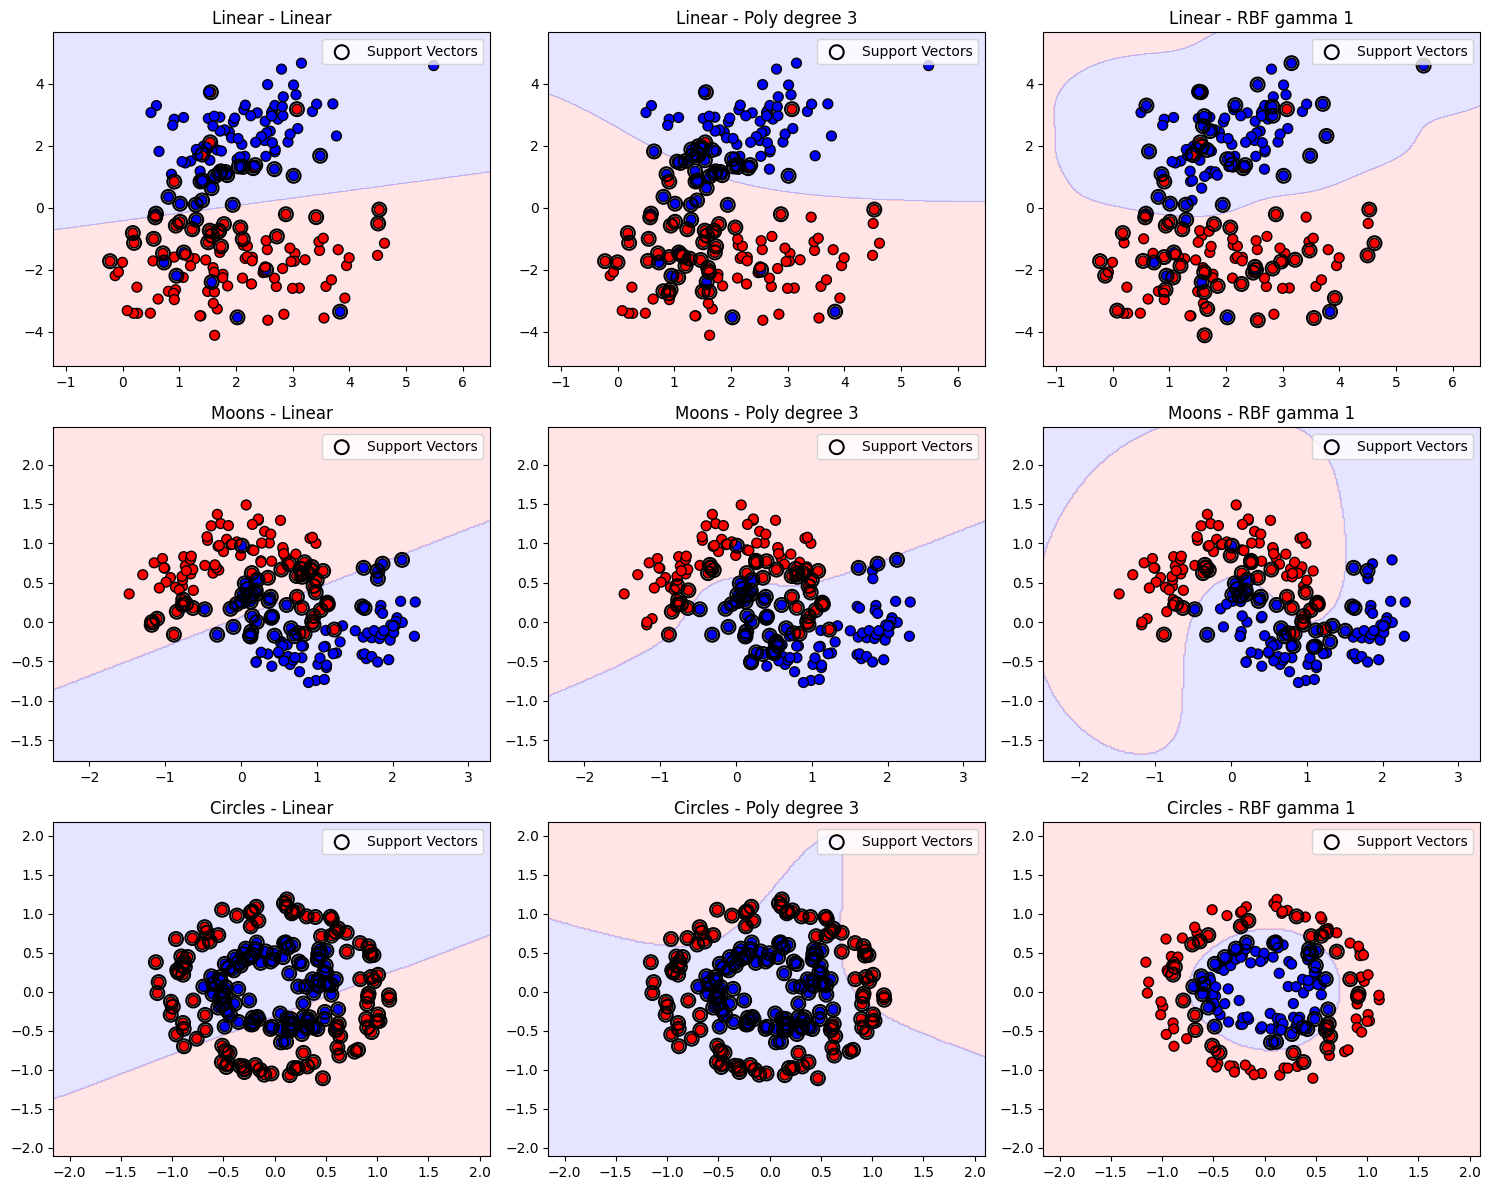

In [7]:
fig, axes = plt.subplots(len(datasets), len(kernels), figsize=(15, 12))

for i, (ds_name, (X, y)) in enumerate(datasets.items()):
    for j, (kernel_name, params) in enumerate(kernels.items()):
        model = SVC(**params)
        model.fit(X, y)
        plot_svm_decision_boundary(model, X, y, axes[i, j], f'{ds_name} - {kernel_name}')

plt.tight_layout()
plt.show()


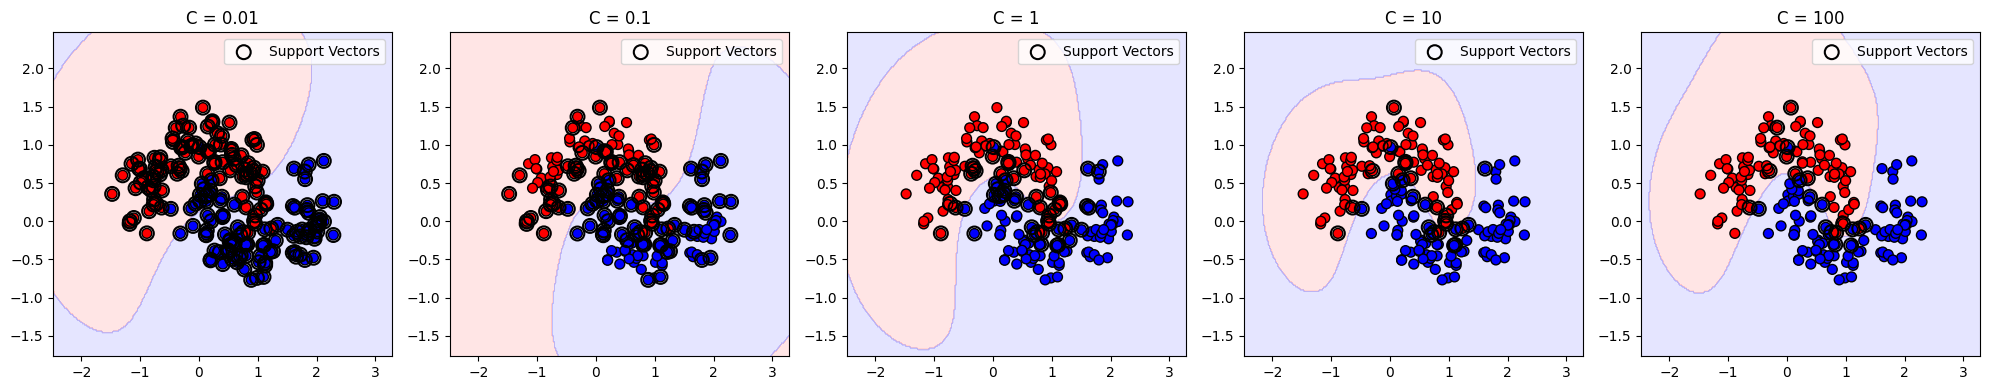

In [20]:
# --- Soft Margin Demonstration: Effect of C on RBF Kernel ---

def plot_c_effects(X, y, kernel='rbf'):
    C_values = [0.01, 0.1, 1, 10, 100]
    fig, axes = plt.subplots(1, 5, figsize=(20, 4))

    for i, C in enumerate(C_values):
        clf = SVC(kernel=kernel, C=C, gamma=1)
        clf.fit(X, y)
        plot_svm_decision_boundary(clf, X, y, axes[i], f"C = {C}")

    plt.tight_layout()
    fig.savefig("figures/C_effects_rbf.png", dpi=300, bbox_inches='tight')
    plt.show()

plot_c_effects(X_moons, y_moons)


In [21]:
def plot_advanced_kernels(X, y):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    for ax, (name, kernel_fn) in zip(axes, advanced_kernels.items()):
        clf = SVC(kernel=kernel_fn)
        clf.fit(X, y)
        plot_svm_decision_boundary(clf, X, y, ax, name)

    plt.tight_layout()
    fig.savefig("figures/advanced_kernels.png", dpi=300, bbox_inches='tight')
    plt.show()


Best Parameters: {'C': 1, 'gamma': 5}
Best Score: 0.975


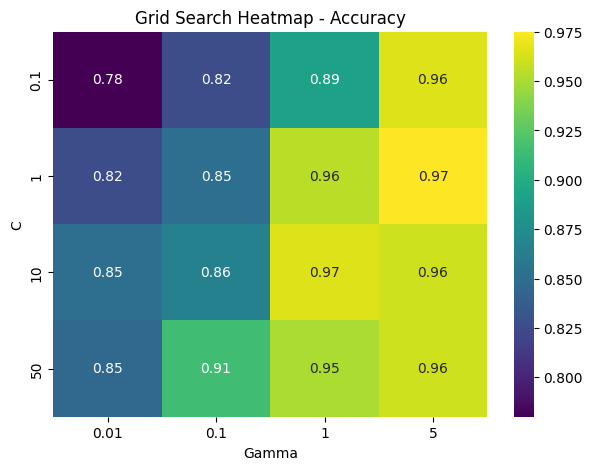

In [22]:
# --- Hyperparameter Tuning with Grid Search ---

from sklearn.model_selection import GridSearchCV
import seaborn as sns

param_grid = {
    "C": [0.1, 1, 10, 50],
    "gamma": [0.01, 0.1, 1, 5]
}

grid = GridSearchCV(
    SVC(kernel="rbf"),
    param_grid,
    cv=5
)
grid.fit(X_moons, y_moons)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

# Heatmap
scores = grid.cv_results_['mean_test_score'].reshape(4, 4)

plt.figure(figsize=(7, 5))
sns.heatmap(scores, annot=True, cmap="viridis",
            xticklabels=param_grid['gamma'],
            yticklabels=param_grid['C'])

plt.xlabel("Gamma")
plt.ylabel("C")
plt.title("Grid Search Heatmap - Accuracy")
plt.savefig("figures/gridsearch_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()


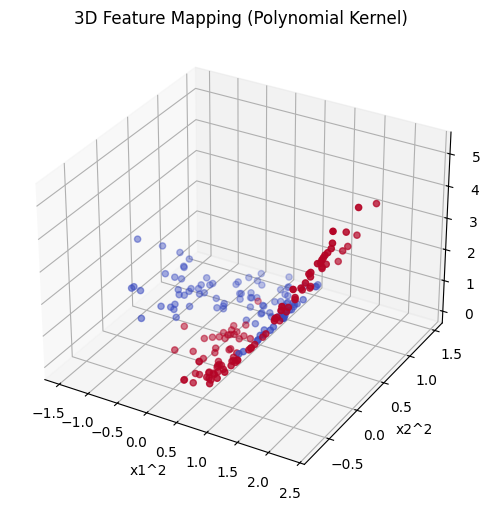

In [13]:
# --- 3D Feature Mapping for Polynomial Kernel ---

from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits.mplot3d import Axes3D

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_moons)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_poly[:, 1], X_poly[:, 2], X_poly[:, 3], c=y_moons, cmap='coolwarm')
ax.set_title("3D Feature Mapping (Polynomial Kernel)")
ax.set_xlabel("x1^2")
ax.set_ylabel("x2^2")
ax.set_zlabel("sqrt(2)*x1*x2")
fig.savefig("figures/3D_polynomial_mapping.png", dpi=300, bbox_inches='tight')
plt.show()


In [26]:
# --- Interactive SVM Visualizer ---

from ipywidgets import interact, FloatSlider, IntSlider

@interact(
    C=FloatSlider(min=0.1, max=10, step=0.1, value=1.0),
    gamma=FloatSlider(min=0.01, max=2, step=0.01, value=0.1),
    degree=IntSlider(min=2, max=6, step=1, value=3)
)
def interactive_svm(C, gamma, degree):
    clf = SVC(kernel='rbf', C=C, gamma=gamma)
    clf.fit(X_moons, y_moons)

    fig, ax = plt.subplots(figsize=(6, 4))
    plot_svm_decision_boundary(clf, X_moons, y_moons, ax,
                               f"C={C}, γ={gamma}")
    plt.show()

interactive(children=(FloatSlider(value=1.0, description='C', max=10.0, min=0.1), FloatSlider(value=0.1, descr…

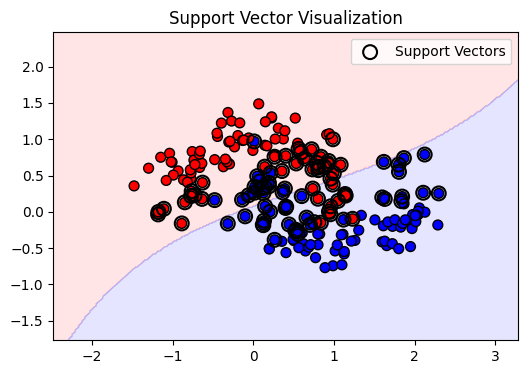

In [27]:
# --- Support Vector Visualization ---

clf = SVC(kernel='rbf', C=1, gamma=0.1)
clf.fit(X_moons, y_moons)

fig, ax = plt.subplots(figsize=(6, 4))
plot_svm_decision_boundary(clf, X_moons, y_moons, ax,
                           "Support Vector Visualization")
fig.savefig("figures/support_vectors.png", dpi=300, bbox_inches='tight')
plt.show()


In [28]:
for i, (ds_name, (X, y)) in enumerate(datasets.items()):
    for j, (kernel_name, params) in enumerate(kernels.items()):
        model = SVC(**params)
        model.fit(X, y)
        fig, ax = plt.subplots(figsize=(6,5))
        plot_svm_decision_boundary(model, X, y, ax, f'{ds_name} - {kernel_name}')
        fig.savefig(f'{ds_name}_{kernel_name}.png', dpi=300)
        plt.close(fig)


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC

# --- Change 1: Set a colorblind-friendly colormap ---
# Example: Use 'viridis' for the decision boundary background
# And high-contrast colors for the data points

def plot_svm_boundary(X, y, model, title="SVM Decision Boundary"):
    # Define a colorblind-friendly color map for the background
    cmap_light = plt.cm.get_cmap('viridis', 2).copy()
    cmap_light.colors[0] = plt.cm.get_cmap('viridis', 2)(0.2) # Light color 1
    cmap_light.colors[1] = plt.cm.get_cmap('viridis', 2)(0.8) # Light color 2

    # Define a high-contrast scatter map
    cmap_bold = ['#377EB8', '#FF7F00'] # Example: a simple high-contrast pair

    # Rest of the plotting code... (e.g., generating meshgrid)

    # Plot the decision boundary background
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

    # Plot the data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.colormaps['viridis'], edgecolor='k', s=20)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar(label='Class')
    plt.show()

# NOTE: Use the name of the palette you chose (e.g., 'viridis') in the PDF!

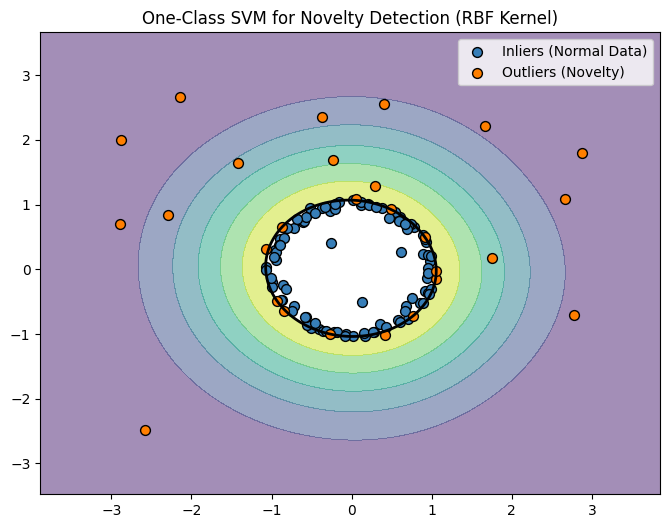

In [31]:
# Import necessary libraries
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np

# 1. Generate the Circles dataset
X, y = make_circles(n_samples=200, factor=0.5, noise=0.05, random_state=42)

# 2. Select ONLY the inner circle points (y=0) as 'normal' data
X_normal = X[y == 0]

# 3. Create a few 'outliers' to test the model
np.random.seed(0)
X_outliers = 3 * np.random.uniform(low=-1, high=1, size=(20, 2))

# 4. Train the One-Class SVM (RBF kernel is typical for this)
# 'nu' parameter estimates the fraction of training data that are outliers (0.1 = 10%)
oc_svm = OneClassSVM(kernel='rbf', gamma=0.5, nu=0.1).fit(X_normal)

# 5. Predict all data (normal + outliers)
X_combined = np.r_[X_normal, X_outliers]
y_pred_combined = oc_svm.predict(X_combined)

# 6. Plotting the results (Use the colorblind-friendly function/palette from before)
plt.figure(figsize=(8, 6))

# Define the meshgrid for plotting
h = 0.02  # step size in the mesh
x_min, x_max = X_combined[:, 0].min() - 1, X_combined[:, 0].max() + 1
y_min, y_max = X_combined[:, 1].min() - 1, X_combined[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Use the same color map setup as your main plotting function
# -1 indicates an outlier (novelty), 1 indicates inlier
Z = oc_svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and novelty area
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.colormaps['viridis'], alpha=0.5)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black') # The novelty boundary

# Plot inliers (blue) and outliers (red)
inliers = X_combined[y_pred_combined == 1]
outliers = X_combined[y_pred_combined == -1]

plt.scatter(inliers[:, 0], inliers[:, 1], s=50, edgecolors='k', color='#377EB8', label='Inliers (Normal Data)')
plt.scatter(outliers[:, 0], outliers[:, 1], s=50, edgecolors='k', color='#FF7F00', label='Outliers (Novelty)')

plt.title("One-Class SVM for Novelty Detection (RBF Kernel)")
plt.legend()
plt.show()